Melakukan regresi dengan MLP

In [4]:
#import library
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [14]:
#load datasets
from sklearn.datasets import load_boston
boston= load_boston()

In [15]:
#key boston datasets
print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [16]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
import pandas as pd
boston_pd = pd.DataFrame(boston.data)
print(boston_pd.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [19]:
boston_pd.columns = boston.feature_names
print (boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [57]:
#spllit data and target
x=boston.data
y=boston.target

In [58]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [59]:
X_train, X_test, y_train, y_test = train_test_split (x,y, test_size = 0.25)

In [60]:
model = MLPRegressor(activation ='relu', hidden_layer_sizes =(50),solver='adam', max_iter= 200, verbose = True)
model.fit(X_train, y_train)
print(model)

y_predict = model.predict (X_test)

Iteration 1, loss = 290.86220437
Iteration 2, loss = 289.21585773
Iteration 3, loss = 287.63904009
Iteration 4, loss = 286.00473624
Iteration 5, loss = 284.41065383
Iteration 6, loss = 282.82317120
Iteration 7, loss = 281.25671855
Iteration 8, loss = 279.64225684
Iteration 9, loss = 278.09269425
Iteration 10, loss = 276.49072702
Iteration 11, loss = 274.93439586
Iteration 12, loss = 273.33267569
Iteration 13, loss = 271.78404684
Iteration 14, loss = 270.18279347
Iteration 15, loss = 268.63019719
Iteration 16, loss = 267.03428034
Iteration 17, loss = 265.43454102
Iteration 18, loss = 263.86630929
Iteration 19, loss = 262.25390694
Iteration 20, loss = 260.62237006
Iteration 21, loss = 259.00864060
Iteration 22, loss = 257.37008306
Iteration 23, loss = 255.72270465
Iteration 24, loss = 254.09073121
Iteration 25, loss = 252.40977897
Iteration 26, loss = 250.69689831
Iteration 27, loss = 249.02266872
Iteration 28, loss = 247.23414224
Iteration 29, loss = 245.53351907
Iteration 30, loss = 24

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
print(metrics.r2_score(y_test, y_predict))
print(metrics.mean_squared_error(y_test, y_predict))

0.5750764624877146
38.9636700364412


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


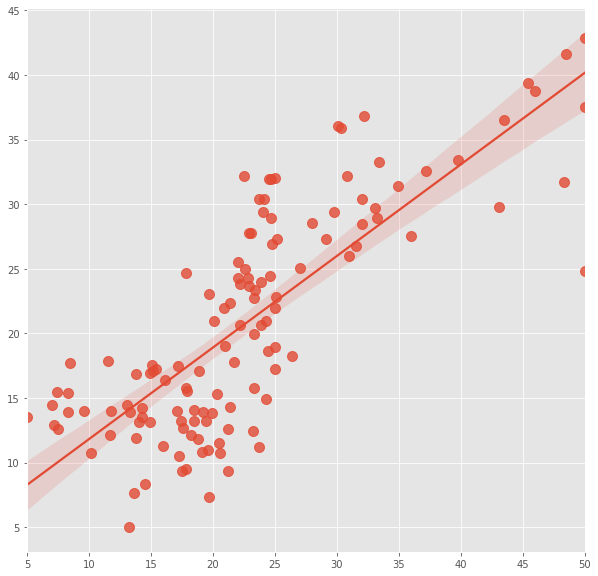

In [62]:
plt.figure (figsize=(10,10))
sns.regplot(y_test, y_predict, fit_reg=True, scatter_kws={"s":100})